In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [1]:
datasets = {
    'Reddit_Title': pd.read_excel('Reddit_Title.xlsx'),
    'Reddit_Combi': pd.read_excel('Reddit_Combi.xlsx'),
    'Twitter_Full': pd.read_excel('Twitter_Full.xlsx'),
    'Twitter_Non_Advert': pd.read_excel('Twitter_Non-Advert.xlsx')
}


NameError: name 'pd' is not defined

In [ ]:
for name, df in datasets.items():
    print(f"sample from {name}:")
    display(df.head(3))
    print(f"\nData types:")
    display(df.dtypes)
    print(f"\n")


Sample from Reddit_Title:


,title,label
0,My aunt and uncle scoring their first gig as p...,0
1,How do I stop stressing about work when I'm at...,1
2,Meeting a fellow suicidal student in middle sc...,1



Data types:


title    object
label     int64
dtype: object



Sample from Reddit_Combi:


,title,body,Body_Title,label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1



Data types:


title         object
body          object
Body_Title    object
label          int64
dtype: object



Sample from Twitter_Full:


,text,hashtags,labels
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1
1,And now we have been given the walkthru book b...,['walkthru'],0
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0



Data types:


text        object
hashtags    object
labels       int64
dtype: object



Sample from Twitter_Non_Advert:


,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1



Data types:


text     object
label     int64
dtype: object

In [ ]:
def clean_dataset(df, name):
    original_count = len(df)
    print(f"Cleaning: {name}")
    print(f"Original count: {original_count}")
    
    df = df.drop_duplicates()
    after_exact_dupes = len(df)
    print(f"After removing exact duplicates: {after_exact_dupes} (removed {original_count - after_exact_dupes})")
    
    text_col = df.select_dtypes(include=['object']).columns[0]
    before_text_dupes = len(df)
    df = df.drop_duplicates(subset=[text_col])
    after_text_dupes = len(df)
    print(f"After removing text duplicates: {after_text_dupes} (removed {before_text_dupes - after_text_dupes})")
    
    print(f"\nFinal count: {len(df)}")
    print(f"Total removed: {original_count - len(df)} ({(original_count - len(df))/original_count*100:.1f}%)")
    
    return df

cleaned_datasets = {}
for name, df in datasets.items():
    cleaned_datasets[name] = clean_dataset(df, name)

Cleaning: Reddit_Title
Original count: 5556
After removing exact duplicates: 5532 (removed 24)
After removing text duplicates: 5522 (removed 10)

Final count: 5522
Total removed: 34 (0.6%)
Cleaning: Reddit_Combi
Original count: 3123
After removing exact duplicates: 3123 (removed 0)
After removing text duplicates: 3098 (removed 25)

Final count: 3098
Total removed: 25 (0.8%)
Cleaning: Twitter_Full
Original count: 8900
After removing exact duplicates: 8525 (removed 375)
After removing text duplicates: 8439 (removed 86)

Final count: 8439
Total removed: 461 (5.2%)
Cleaning: Twitter_Non_Advert
Original count: 2051
After removing exact duplicates: 1972 (removed 79)
After removing text duplicates: 1972 (removed 0)

Final count: 1972
Total removed: 79 (3.9%)

Reddit_Title:
  Shape: (5522, 2)
  Columns: ['title', 'label']

Reddit_Combi:
  Shape: (3098, 4)
  Columns: ['title', 'body', 'Body_Title', 'label']

Twitter_Full:
  Shape: (8439, 3)
  Columns: ['text', 'hashtags', 'labels']

Twitter_Non

In [ ]:
standardized_datasets = {}

df_reddit_title = cleaned_datasets['Reddit_Title'].copy()
standardized_datasets['Reddit_Title'] = pd.DataFrame({
    'content': df_reddit_title['title'],
    'label': df_reddit_title['label']
})

df_reddit_combi = cleaned_datasets['Reddit_Combi'].copy()
standardized_datasets['Reddit_Combi'] = pd.DataFrame({
    'content': df_reddit_combi['body'],
    'label': df_reddit_combi['label']
})

df_twitter_full = cleaned_datasets['Twitter_Full'].copy()
standardized_datasets['Twitter_Full'] = pd.DataFrame({
    'content': df_twitter_full['text'],
    'label': df_twitter_full['labels']
})

df_twitter_non_advert = cleaned_datasets['Twitter_Non_Advert'].copy()
standardized_datasets['Twitter_Non_Advert'] = pd.DataFrame({
    'content': df_twitter_non_advert['text'],
    'label': df_twitter_non_advert['label']
})

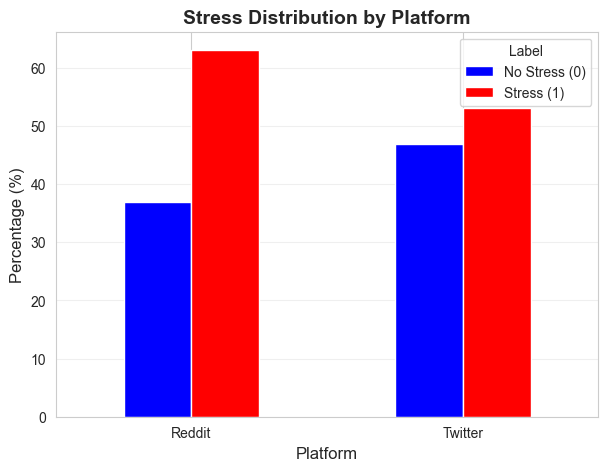


Stress Distribution by Platform:
label         0      1
platform              
Reddit    36.96  63.04
Twitter   46.97  53.03


In [48]:

platform_stress = pd.crosstab(combined_df['platform'], combined_df['label'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(7, 5))
platform_stress.plot(kind='bar', ax=ax, color=['blue', 'red'])
ax.set_title('Stress Distribution by Platform', fontsize=14, fontweight='bold')
ax.set_xlabel('Platform', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['No Stress (0)', 'Stress (1)'], title='Label')
ax.grid(axis='y', alpha=0.3)
plt.show()

print("\nStress Distribution by Platform:")
print(platform_stress.round(2))


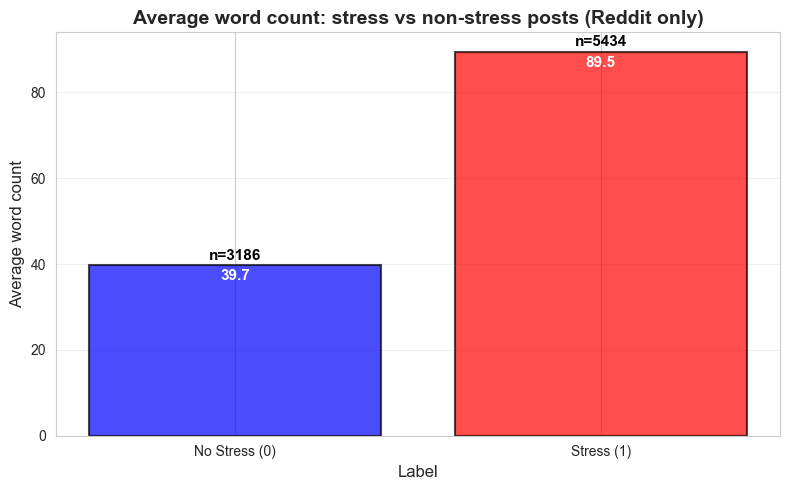


Text-level observation (Reddit posts only):
Average word count, no stress (n=3186): 39.74
Average word count, stress (n=5434): 89.50
Diff: 49.76 words


In [60]:
import matplotlib.pyplot as plt

reddit_df = combined_df[combined_df['platform'] == 'Reddit'].copy()

reddit_df['word_count'] = reddit_df['content'].str.split().str.len()

stress_posts_reddit = reddit_df[reddit_df['label'] == 1]
non_stress_posts_reddit = reddit_df[reddit_df['label'] == 0]
stress_avg_reddit = stress_posts_reddit['word_count'].mean()
non_stress_avg_reddit = non_stress_posts_reddit['word_count'].mean()
stress_count_reddit = len(stress_posts_reddit)
non_stress_count_reddit = len(non_stress_posts_reddit)

fig, ax = plt.subplots(figsize=(8, 5))
categories = ['No Stress (0)', 'Stress (1)']
values = [non_stress_avg_reddit, stress_avg_reddit]
counts = [non_stress_count_reddit, stress_count_reddit]
colors = ['blue', 'red']

bars = ax.bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_title('Average word count: stress vs non-stress posts (Reddit only)', fontsize=14, fontweight='bold')
ax.set_ylabel('Average word count', fontsize=12)
ax.set_xlabel('Label', fontsize=12)
ax.grid(axis='y', alpha=0.3)

for bar, n in zip(bars, counts):
    ax.text(
        bar.get_x() + bar.get_width() / 2.,
        bar.get_height() + 0.5,
        f'n={n}',
        ha='center',
        va='bottom',
        fontsize=11,
        color='black',
        fontweight='bold'
    )
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height - 1,
            f'{height:.1f}',
            ha='center', va='top', fontsize=11, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

print(f"\nText-level observation (Reddit posts only):")
print(f"Average word count, no stress (n={non_stress_count_reddit}): {non_stress_avg_reddit:.2f}")
print(f"Average word count, stress (n={stress_count_reddit}): {stress_avg_reddit:.2f}")
print(f"Diff: {abs(stress_avg_reddit - non_stress_avg_reddit):.2f} words")


In [52]:
from sklearn.model_selection import train_test_split

reddit_texts = []
reddit_labels = []

for name, df in standardized_datasets.items():
    if 'Reddit' in name:
        reddit_texts.extend(df['content'].tolist())
        reddit_labels.extend(df['label'].tolist())

reddit_data = pd.DataFrame({
    'text': reddit_texts,
    'label': reddit_labels
})

reddit_data = reddit_data.dropna(subset=['text'])
reddit_data = reddit_data[reddit_data['text'].str.strip() != '']


print(f"\nLabel distribution:")
print(reddit_data['label'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    reddit_data['text'], 
    reddit_data['label'], 
    test_size=0.2, 
    random_state=42,
    stratify=reddit_data['label']
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

twitter_texts = []
twitter_labels = []

for name, df in standardized_datasets.items():
    if 'Twitter' in name:
        twitter_texts.extend(df['content'].tolist())
        twitter_labels.extend(df['label'].tolist())

twitter_data = pd.DataFrame({
    'text': twitter_texts,
    'label': twitter_labels
})
twitter_data = twitter_data.dropna(subset=['text'])
twitter_data = twitter_data[twitter_data['text'].str.strip() != '']


Label distribution:
label
1    5430
0    3183
Name: count, dtype: int64

Training set: 6890 samples
Testing set: 1723 samples


In [ ]:
import subprocess
import sys

packages = [
    "transformers",
    "torch", 
    "accelerate>=0.26.0"
]

for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])


Installing required packages for BERT...
This may take a few minutes...

Installing transformers...

Installing torch...

Installing accelerate>=0.26.0...

✓ All packages installed successfully!


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss
import matplotlib.pyplot as plt


tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
print("Training complete!")

lr_predictions = lr_model.predict(X_test_tfidf)

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("\nClassification Report:")
print(classification_report(y_test, lr_predictions, target_names=['No Stress', 'Stress']))



Training Logistic Regression...
Training complete!

Classification Report:
              precision    recall  f1-score   support

   No Stress       0.90      0.81      0.86       637
      Stress       0.90      0.95      0.92      1086

    accuracy                           0.90      1723
   macro avg       0.90      0.88      0.89      1723
weighted avg       0.90      0.90      0.90      1723



In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

print("Loading BERT model..")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)
model.to(device)
print("BERT model loaded!")


✓ accelerate version: 1.12.0
SETTING UP BERT MODEL
Using device: cpu
Loading BERT model (this may take a moment)...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT model loaded!


In [ ]:
class StressDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

print("Prepare data for BERT..")
train_dataset = StressDataset(X_train.reset_index(drop=True), y_train.reset_index(drop=True), tokenizer)
test_dataset = StressDataset(X_test.reset_index(drop=True), y_test.reset_index(drop=True), tokenizer)

print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")


Preparing data for BERT...
Training samples: 6890
Testing samples: 1723


In [15]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./bert_results',
    num_train_epochs=1, # just one epoch for speed since I have wooden laptop :)
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    eval_strategy='no',
    save_strategy='no',
    report_to='none'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
print("\nBERT training complete!")


TRAINING BERT MODEL (FAST - 1 EPOCH)
Training 1 epoch (should take ~5-10 minutes on CPU)...


Step,Training Loss
50,0.025500
100,0.019400
150,0.028000
200,0.051700



BERT training complete!


In [ ]:

bert_results = trainer.evaluate()

bert_predictions = trainer.predict(test_dataset)
bert_preds = bert_predictions.predictions.argmax(-1)

bert_accuracy = accuracy_score(y_test, bert_preds)
bert_precision = precision_score(y_test, bert_preds)
bert_recall = recall_score(y_test, bert_preds)
bert_f1 = f1_score(y_test, bert_preds)

print(f"Accuracy:  {bert_accuracy:.4f} ({bert_accuracy*100:.2f}%)")
print(f"Precision: {bert_precision:.4f}")
print(f"Recall:    {bert_recall:.4f}")
print(f"F1-Score:  {bert_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, bert_preds, target_names=['No Stress', 'Stress']))


EVALUATING BERT MODEL



BERT RESULTS (Reddit Test Set)
Accuracy:  0.9466 (94.66%)
Precision: 0.9560
Recall:    0.9595
F1-Score:  0.9577

Classification Report:
              precision    recall  f1-score   support

   No Stress       0.93      0.92      0.93       637
      Stress       0.96      0.96      0.96      1086

    accuracy                           0.95      1723
   macro avg       0.94      0.94      0.94      1723
weighted avg       0.95      0.95      0.95      1723



RESEARCH QUESTION 1: BERT vs LOGISTIC REGRESSION COMPARISON

Model Comparison (Reddit Test Set):
   Metric  Logistic Regression     BERT
 Accuracy             0.898433 0.946605
Precision             0.897123 0.955963
   Recall             0.947514 0.959484
 F1-Score             0.921630 0.957721

IMPROVEMENT ANALYSIS
Accuracy improvement: +4.82%
F1-Score improvement: +3.61%


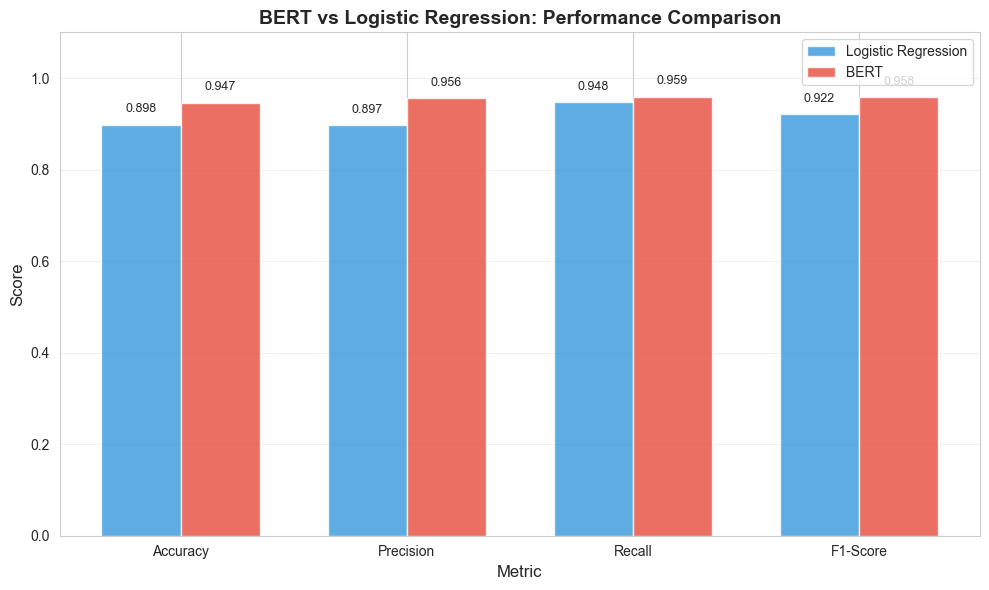


ANSWER TO RESEARCH QUESTION 1
YES - BERT (0.9577 F1) outperforms Logistic Regression (0.9216 F1)
The improvement is 3.61% in F1-Score


In [ ]:
import matplotlib.pyplot as plt

comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'BERT': [bert_accuracy, bert_precision, bert_recall, bert_f1]
}
comparison_df = pd.DataFrame(comparison_data)

print("\nModel comparison (Reddit test set):")
print(comparison_df.to_string(index=False))

accuracy_improvement = (bert_accuracy - lr_accuracy) * 100
f1_improvement = (bert_f1 - lr_f1) * 100

print(f"Accuracy improvement: {accuracy_improvement:+.2f}%")
print(f"F1-Score improvement: {f1_improvement:+.2f}%")

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(comparison_data['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_data['Logistic Regression'], width, 
               label='Logistic Regression', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_data['BERT'], width, 
               label='BERT', color='#e74c3c', alpha=0.8)

ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('BERT vs Logistic Regression: Performance Comparison', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_data['Metric'])
ax.legend()
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
import pickle

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

trainer.save_model('./bert_stress_model')
tokenizer.save_pretrained('./bert_stress_model')

MODELS SAVED FOR RESEARCH QUESTION 2
✓ Logistic Regression model saved (lr_model.pkl)
✓ TF-IDF vectorizer saved (tfidf_vectorizer.pkl)
✓ BERT model saved (./bert_stress_model/)

✓ Twitter data ready for RQ2: 10411 samples
  - Stress posts: 5521
  - No-stress posts: 4890

Ready for Research Question 2:
How do models trained on Reddit generalize to Twitter data?


In [ ]:
import pickle
import os

if os.path.exists('lr_model.pkl') and os.path.exists('tfidf_vectorizer.pkl'):
    with open('lr_model.pkl', 'rb') as f:
        lr_model = pickle.load(f)
    with open('tfidf_vectorizer.pkl', 'rb') as f:
        tfidf = pickle.load(f)
else:
    print("baseline models not found.")

if os.path.exists('./bert_stress_model'):
    from transformers import BertTokenizer, BertForSequenceClassification, Trainer
    import torch
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    bert_tokenizer = BertTokenizer.from_pretrained('./bert_stress_model')
    bert_model = BertForSequenceClassification.from_pretrained('./bert_stress_model')
    bert_model.to(device)
else:
    print("BERT model not found.")

LOADING TRAINED MODELS
✓ Logistic Regression model loaded
✓ TF-IDF vectorizer loaded
✓ BERT model loaded


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_twitter = twitter_data['text'].tolist()
y_twitter = twitter_data['label'].tolist()

X_twitter_tfidf = tfidf.transform(X_twitter)

lr_twitter_predictions = lr_model.predict(X_twitter_tfidf)

lr_twitter_accuracy = accuracy_score(y_twitter, lr_twitter_predictions)
lr_twitter_precision = precision_score(y_twitter, lr_twitter_predictions)
lr_twitter_recall = recall_score(y_twitter, lr_twitter_predictions)
lr_twitter_f1 = f1_score(y_twitter, lr_twitter_predictions)

print("\nClassification report:")
print(classification_report(y_twitter, lr_twitter_predictions, target_names=['No Stress', 'Stress']))


Classification report:
              precision    recall  f1-score   support

   No Stress       0.75      0.67      0.71      4890
      Stress       0.73      0.80      0.76      5521

    accuracy                           0.74     10411
   macro avg       0.74      0.74      0.74     10411
weighted avg       0.74      0.74      0.74     10411



In [55]:
from torch.utils.data import Dataset

class StressDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

twitter_dataset = StressDataset(
    X_twitter,
    y_twitter,
    bert_tokenizer,
    max_length=128
)

from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./bert_results',
    per_device_eval_batch_size=32,
    report_to='none'
)

bert_trainer = Trainer(
    model=bert_model,
    args=training_args,
    compute_metrics=compute_metrics
)

bert_twitter_predictions = bert_trainer.predict(twitter_dataset)
bert_twitter_preds = bert_twitter_predictions.predictions.argmax(-1)

bert_twitter_accuracy = accuracy_score(y_twitter, bert_twitter_preds)
bert_twitter_precision = precision_score(y_twitter, bert_twitter_preds)
bert_twitter_recall = recall_score(y_twitter, bert_twitter_preds)
bert_twitter_f1 = f1_score(y_twitter, bert_twitter_preds)

print("\nClassification Report:")
print(classification_report(y_twitter, bert_twitter_preds, target_names=['No Stress', 'Stress']))

KeyboardInterrupt: 

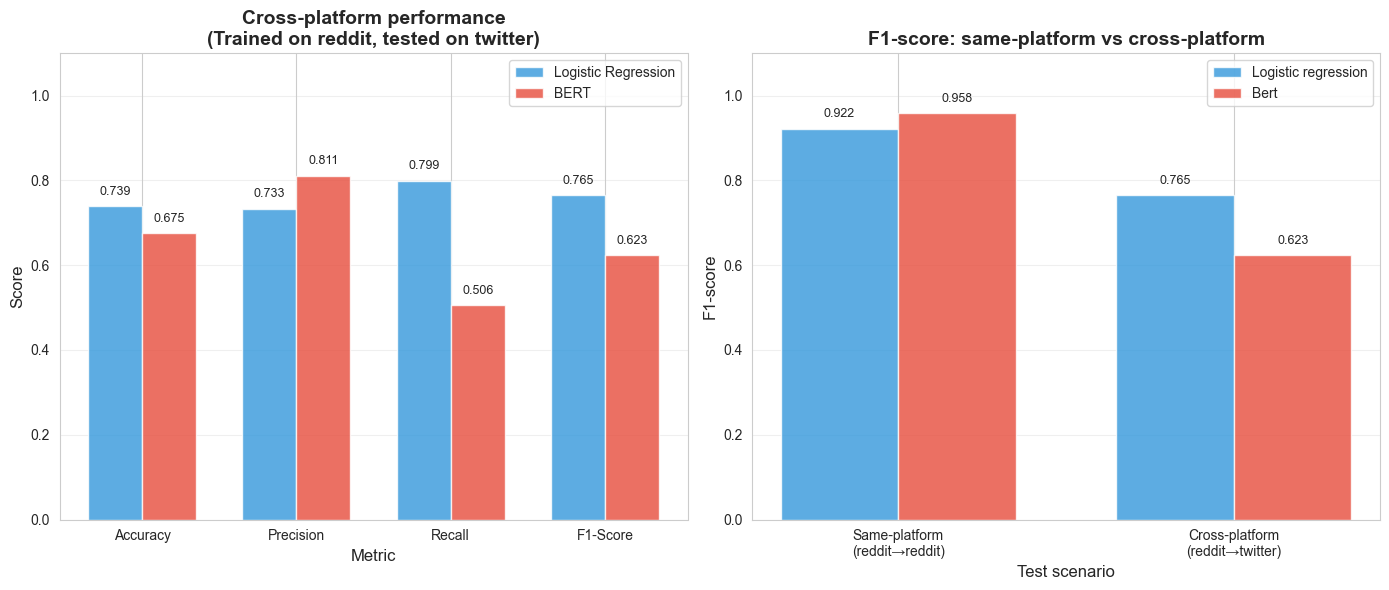

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.35

lr_twitter_metrics = [lr_twitter_accuracy, lr_twitter_precision, lr_twitter_recall, lr_twitter_f1]
bert_twitter_metrics = [bert_twitter_accuracy, bert_twitter_precision, bert_twitter_recall, bert_twitter_f1]

bars1 = axes[0].bar(x - width/2, lr_twitter_metrics, width, label='Logistic Regression', color='#3498db', alpha=0.8)
bars2 = axes[0].bar(x + width/2, bert_twitter_metrics, width, label='BERT', color='#e74c3c', alpha=0.8)

axes[0].set_xlabel('Metric', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Cross-platform performance\n(Trained on reddit, tested on twitter)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim(0, 1.1)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

f1_comparison = {
    'Same-platform\n(reddit→reddit)': [lr_f1, bert_f1],
    'Cross-platform\n(reddit→twitter)': [lr_twitter_f1, bert_twitter_f1]
}

x2 = np.arange(2)
bars3 = axes[1].bar(x2 - width/2, [lr_f1, lr_twitter_f1], width, 
                    label='Logistic regression', color='#3498db', alpha=0.8)
bars4 = axes[1].bar(x2 + width/2, [bert_f1, bert_twitter_f1], width, 
                    label='Bert', color='#e74c3c', alpha=0.8)

axes[1].set_xlabel('Test scenario', fontsize=12)
axes[1].set_ylabel('F1-score', fontsize=12)
axes[1].set_title('F1-score: same-platform vs cross-platform', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(['Same-platform\n(reddit→reddit)', 'Cross-platform\n(reddit→twitter)'])
axes[1].legend()
axes[1].set_ylim(0, 1.1)
axes[1].grid(axis='y', alpha=0.3)

for bar in bars3:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()